In [21]:
#!/usr/bin/env python

from __future__ import division #чтоб делилось нормально (но ведь оно и без этого нормально делится...)
#__future__ - псевдомодуль, который программисты могут использовать для включения новых языковых функций, которые не совместимы с текущим интерпретатором
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [22]:
def initState(N):   # generates random spin state
    state = 2*np.random.randint(2, size=N)-1
    return state

In [23]:
def mcStep(config, beta): # Monte Carlo Metropolis step
    for i in range(N):
                a = np.random.randint(0, N)
                s =  config[a]
                nb = config[(a+1)%N] + config[(a-1)%N]
                # here %N helps to make the geometry toric
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a] = s

In [24]:
def calcEnergy(config):
    #energy of a given configuration
    energy = 0
    for i in range(len(config)):
            S = config[i]
            nb = config[(i+1)%N] + config[(i-1)%N]
            energy += -nb*S
    return energy/2.

def calcMag(config):
    #magnetization of a given configuration
    mag = np.sum(config)
    return mag

In [25]:
## change these parameters for a smaller (faster) simulation 
nt      = 2000         #  number of temperature points
N       = 16         #  size of the lattice, N x N
eqSteps = 1024       #  number of MC sweeps for equilibration
mcSteps = 1024       #  number of MC sweeps for calculation

T       = np.linspace(1., 4., nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values

In [26]:
for tt in range(nt):
    E1 = M1 = E2 = M2 = 0
    config = initState(N)
    beta=1.0/T[tt]; beta2=beta*beta;
    
    for i in range(eqSteps):         # equilibrate
        mcStep(config, beta)           # Monte Carlo moves

    for i in range(mcSteps):
        mcStep(config, beta)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene

    E[tt] = n1*E1 # averaged!
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*beta2
    X[tt] = (n1*M2 - n2*M1*M1)*beta

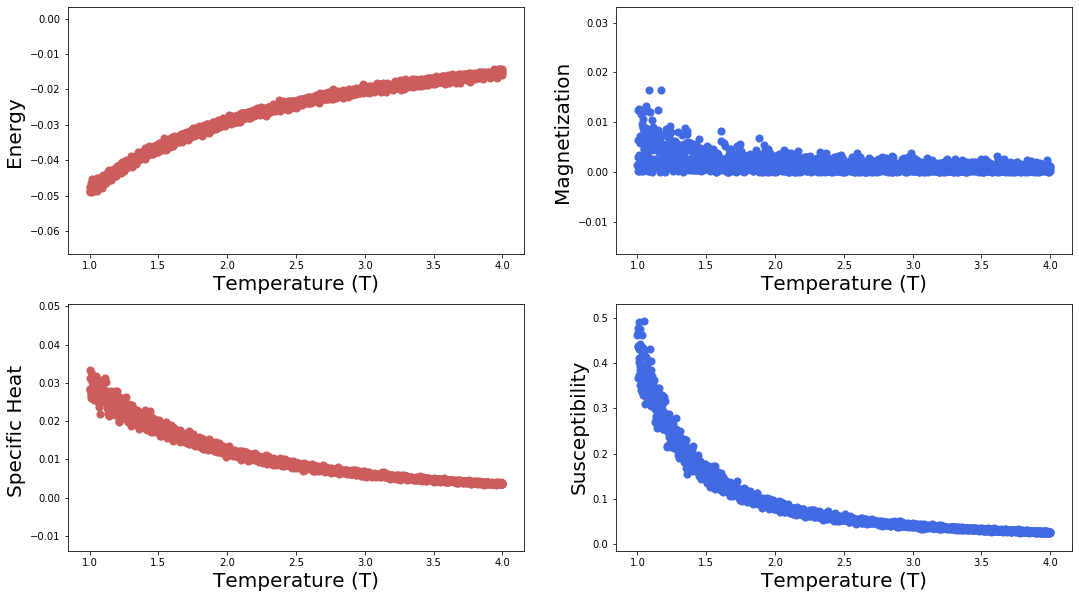

In [27]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

In [28]:
import pandas as pd
from numpy.random import randint

df = pd.DataFrame(columns=['Configuration', 'Inverse temperature'])

for tt in range(nt):

    E1 = M1 = E2 = M2 = 0
    config = initState(N)
    beta=1.0/T[tt]
    
    
    for i in range(eqSteps):         # equilibrate
        mcStep(config, beta)           # Monte Carlo moves
    
    
    df.loc[tt] = [config] + [beta]

In [29]:
df.tail()

,Configuration,Inverse temperature
1995,"[1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1...",0.250376
1996,"[-1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1,...",0.250282
1997,"[1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1...",0.250188
1998,"[1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1...",0.250094
1999,"[-1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, ...",0.250000
